In [55]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
import datetime
custom_date_parser = lambda x:datetime.datetime.fromtimestamp(float(x)/1000.0).strftime('%Y-%m-%d %H:%M:%S.%f')

In [57]:

df = pd.read_csv('data/2020-10-18.csv',parse_dates =['timestamp_ms'],date_parser=custom_date_parser)
df.head()

C:\Users\choon\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,tweet_id,text,link,created_at,timestamp_ms,user_id,user_name,user_screen_name,user_location,geo,coordinates,place_full_name,place_country,retweeted_status_id,in_reply_to_status_id,sarcasm_value
0,1.317620e+18,"RT @MajorPatriot: ""He's a criminal. He's comm...",https://twitter.com/joelstephens7/status/13176...,17/10/2020 23:59,2020-10-18 08:13:20,1.050534e+09,Joel Stephens,joelstephens7,NaN,NaN,NaN,NaN,NaN,1.317590e+18,NaN,59
1,1.317620e+18,The wya she single handedly saved 2020 https:/...,https://twitter.com/muglermonsterr/status/1317...,17/10/2020 23:59,2020-10-18 08:13:20,2.708109e+09,Avatar Gabriel 🌊,muglermonsterr,"Phoenix, AZ",NaN,NaN,"Phoenix, AZ",United States,NaN,NaN,12
2,1.317620e+18,RT @dbongino: WHAT ELSE DO CHINA &amp; RUSSIA ...,https://twitter.com/SchumannSteve/status/13176...,17/10/2020 23:59,2020-10-18 08:13:20,3.335182e+08,Steven Schumann,SchumannSteve,"Grover Beach to Nipomo, CA",NaN,NaN,NaN,NaN,1.317590e+18,NaN,-55
3,1.317620e+18,@EVR551 TRUMP'S department of defense. The art...,https://twitter.com/Pooch7171/status/131761637...,17/10/2020 23:59,2020-10-18 08:13:20,1.764774e+08,Gruncle Pooch ⚪,Pooch7171,VerticalSafeZoneAboveTheBag,NaN,NaN,NaN,NaN,NaN,1.317610e+18,21
4,1.317620e+18,RT @machineiv: Dan Rather gets it.\n\nYou have...,https://twitter.com/jgkoomey/status/1317616370...,17/10/2020 23:59,2020-10-18 08:13:20,1.388302e+08,Jonathan Koomey,jgkoomey,"California, USA",NaN,NaN,NaN,NaN,1.317600e+18,NaN,-23


In [58]:
import datetime
print(df['timestamp_ms'][0])
print(df['timestamp_ms'][1])
df['timestamp_ms'] = [datetime.datetime.fromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S.%f') for x in df['timestamp_ms']]
df.head()

2020-10-18 08:13:20
2020-10-18 08:13:20


TypeError: an integer is required (got type Timestamp)

In [ ]:
df.shape

In [ ]:
text = df['text']

## Preliminary Sentimental Analysis

In [59]:
!pip install nltk

You should consider upgrading via the 'c:\users\choon\appdata\local\continuum\anaconda3\python.exe -m pip install --upgrade pip' command.

In [60]:
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 
def process_tweets(text):
    
    #stripping the common stop letters
    text = re.sub(r'\@\w+|\#|\n|]b','', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text_tokens = word_tokenize(text)
    filtered_words = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_words)
nltk.download('punkt')
tokens = nltk.word_tokenize(text[16])
print(text[16])
print(tokens)

        

Blow me, dirtbag
['Blow', 'me', ',', 'dirtbag']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\choon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\choon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [61]:
trump_text = []
biden_text = []

for sentence in text:
    if('#Trump' in sentence):
        trump_text.append(sentence)
    else: 
        biden_text.append(sentence)

trump_text

['RT @MajorPatriot: "He\'s a criminal.  He\'s committed crimes."  -- President Trump just now about Joe Biden\n\n#TrumpRallyMichigan',
 'RT @FrankBarone43: President Trump is winning in a landslide mark it down #Trump2020',
 'RT @MajorPatriot: "He\'s a criminal.  He\'s committed crimes."  -- President Trump just now about Joe Biden\n\n#TrumpRallyMichigan',
 '#MAGA #Trump2020 #FourMoreYears #FreedomOfSpeech',
 'RT @Rena1776: How TRUE!!\n\n#clintons #BenghaziAintGoingAway #Obama #Biden\n#Trump https://t.co/LGQkRptiLo',
 'RT @MalcolmNance: Let #TrumpMoveToRussia. Our national security would be safer if he joins Steven Segal',
 'RT @alfeubruno28: Go Trump\n#Trump2020 https://t.co/WV6Mv14sse',
 "@AmericanPeace_ @EllenStreiff @DrBiden He did, you weren't there, tell the truth. #Trump goons lie",
 'RT @marinekevie: Sleepy Joe will sell America to China. Vote @realDonaldTrump #MAGA2020 #Trump2020LandslideVictory',
 '@MeidasTouch #TrumpTheSnake',
 'RT @trespatines1: One of the few things #Trump

In [62]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
#nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 
def process_tweets(text):
    
    #stripping the common stop letters
    text = re.sub(r'\@\w+|\#|\n|]b','', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub('([A-Z][a-z]+)', r' \1', text)
    text_tokens = word_tokenize(text)
    filtered_words = [w for w in text_tokens if not w in stop_words]
    #print(filtered_words)
    return " ".join(filtered_words)
        

In [63]:
text = df['text']

In [64]:
RT=[]
for sentence in text:
    if ('RT' in sentence):
        RT.append(sentence)
RT

['RT @MajorPatriot: "He\'s a criminal.  He\'s committed crimes."  -- President Trump just now about Joe Biden\n\n#TrumpRallyMichigan',
 'RT @dbongino: WHAT ELSE DO CHINA &amp; RUSSIA HAVE ON BIDEN?',
 'RT @machineiv: Dan Rather gets it.\n\nYou have no excuse to be patting Republicans on the back. https://t.co/mva1inSrWt',
 "RT @RedState: Media Tries to Use Hunter Biden's Drug Problem to Protect Daddy Joe \n https://t.co/DYWjQIKE6e",
 'RT @funder: Biden will never tweet any of this garbage. Ever. Not once. #BidenCares',
 'RT @CREWcrew: Forget draining the swamp; the president slapped his name on it and began charging admission.\nhttps://t.co/4vyEunCIDE',
 "RT @BillR: Lol, this isn't Biden's house and he hasn't been a senator in 12 years?",
 'RT @thebradfordfile: Trump is going to win MICHIGAN.',
 'RT @FrankBarone43: President Trump is winning in a landslide mark it down #Trump2020',
 'RT @TeamTrump: LIVE: President Donald Trump in Janesville, WI #Wisconsin\n\nText VOTE to 88022 https://

In [65]:
processed = []
rt_tweets = pd.DataFrame(RT,columns=['retweets'])


for i in range(len(RT)):
    processed.append(process_tweets(RT[i]))
rt_tweets['processed_tweets'] = processed
rt_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25928 entries, 0 to 25927
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   retweets          25928 non-null  object
 1   processed_tweets  25928 non-null  object
dtypes: object(2)
memory usage: 405.2+ KB


In [66]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import random
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', -1)
#nltk.download('vader_lexicon')
sa = SentimentIntensityAnalyzer()
trump_score = 0
biden_score = 0

#print(trump_text[30])
#print(sa.polarity_scores(trump_text[30])) #inaccurate
scores=[]
for i in range(len(rt_tweets)):
    scores.append(sa.polarity_scores(rt_tweets['processed_tweets'][i]))
rt_tweets['polarity_scores'] = scores
rt_tweets.sample(40)

,retweets,processed_tweets,polarity_scores
3002,RT @PJVogt: Everything that is possible has ha...,RT Everything possible happened We start https...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
21327,RT @RyanAFournier: I just cast my vote to re-e...,RT I cast vote reelect President Donald J Trum...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
22523,RT @garysteveneaton: Defund NPR https://t.co/y...,RT Defund NPR httpstcoy7RMI UoD15,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
8521,RT @kenklippenstein: Famous nepotism disliker ...,RT Famous nepotism disliker Donald Trump Jr,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
18587,"RT @BillR: Lol, this isn't Biden's house and h...",RT Lol isnt Bidens house hasnt senator 12 years,"{'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'comp..."
6560,RT @vanesavallejo3: Obama was elegant with lie...,RT Obama elegant lies Trump brutal truth,"{'neg': 0.451, 'neu': 0.196, 'pos': 0.353, 'co..."
3645,RT @pumpernicklebe1: AND CUTTING DAD IN ON THE...,RT AND CUTTING DAD IN ON THE TAKE OH MY httpst...,"{'neg': 0.169, 'neu': 0.831, 'pos': 0.0, 'comp..."
850,RT @RealBrysonGray: Joe Biden said 8 and 9 yea...,RT Joe Biden said 8 9 year olds able get sex c...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
15029,RT @PalmerReport: Eric Trump just stepped in i...,RT Eric Trump stepped httpstcoC Vlt Sj83fR,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
8578,RT @DFBHarvard: RETWEET IF YOU'LL JOIN ME IN C...,RT RETWEET IF YOULL JOIN ME IN CALLING FOR A S...,"{'neg': 0.0, 'neu': 0.728, 'pos': 0.272, 'comp..."


In [67]:
rt_tweets['compounded'] = rt_tweets['polarity_scores'].apply(lambda x: x['compound'])

In [68]:
rt_tweets['compounded'].mean()

0.009964906664609289

In [69]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import random
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', -1)
#nltk.download('vader_lexicon')
sa = SentimentIntensityAnalyzer()
trump_score = 0
biden_score = 0

#print(trump_text[30])
#print(sa.polarity_scores(trump_text[30])) #inaccurate
scores=[]
for i in range(len(trump_text)):
    scores.append(sa.polarity_scores(trump_text['text'][i]))
trump_text['polarity_scores'] = scores
trump_text.sample(20)


TypeError: list indices must be integers or slices, not str

### Comments about Vader

Result from Vader doesnt look very convincing and promising

nltk.sentiment.util.demo_liu_hu_lexicon(sentence, plot=False)

Basic example of sentiment classification using Liu and Hu opinion lexicon. This function simply counts the number of positive, negative and neutral words in the sentence and classifies it depending on which polarity is more represented. Words that do not appear in the lexicon are considered as neutral.

In [70]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import random
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', -1)
#nltk.download('vader_lexicon')
sa = SentimentIntensityAnalyzer()
trump_score = 0
biden_score = 0

#print(trump_text[30])
#print(sa.polarity_scores(trump_text[30])) #inaccurate
scores=[]
for i in range(len(trump_text)):
    scores.append(sa.polarity_scores(trump_text['processed_tweets'][i]))
trump_text['processed_polarity_scores'] = scores
trump_text.sample(20)


TypeError: list indices must be integers or slices, not str

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import random
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', -1)
#nltk.download('vader_lexicon')
sa = SentimentIntensityAnalyzer()
biden_score = 0
biden_score = 0

#print(biden_text[30])
#print(sa.polarity_scores(biden_text[30])) #inaccurate
scores=[]
for i in range(len(biden_text)):
    scores.append(sa.polarity_scores(biden_text['processed_tweets'][i]))
biden_text['processed_polarity_scores'] = scores
biden_text.sample(20)


## Generating word cloud

seeing if we can get anything from the word cloud

In [ ]:
!pip install wordcloud

In [ ]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
text = " ".join(text for text in trump_text['processed_tweets'])
len(text)

In [ ]:
trump_text['processed_tweets']
wordcloud= WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
text = " ".join(text for text in biden_text['processed_tweets'])
len(text)
wordcloud= WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### General Sentiment over time

In [72]:
processed = []

for i in range(df.shape[0]):
    processed.append(process_tweets(df['text'][i]))
df['processed_tweets'] = processed
from nltk.sentiment.vader import SentimentIntensityAnalyzer
df.head()

,tweet_id,text,link,created_at,timestamp_ms,user_id,user_name,user_screen_name,user_location,geo,coordinates,place_full_name,place_country,retweeted_status_id,in_reply_to_status_id,sarcasm_value,processed_tweets
0,1.317620e+18,"RT @MajorPatriot: ""He's a criminal. He's comm...",https://twitter.com/joelstephens7/status/13176...,17/10/2020 23:59,2020-10-18 08:13:20,1.050534e+09,Joel Stephens,joelstephens7,NaN,NaN,NaN,NaN,NaN,1.317590e+18,NaN,59,RT Hes criminal Hes committed crimes President...
1,1.317620e+18,The wya she single handedly saved 2020 https:/...,https://twitter.com/muglermonsterr/status/1317...,17/10/2020 23:59,2020-10-18 08:13:20,2.708109e+09,Avatar Gabriel 🌊,muglermonsterr,"Phoenix, AZ",NaN,NaN,"Phoenix, AZ",United States,NaN,NaN,12,The wya single handedly saved 2020 httpstco Os...
2,1.317620e+18,RT @dbongino: WHAT ELSE DO CHINA &amp; RUSSIA ...,https://twitter.com/SchumannSteve/status/13176...,17/10/2020 23:59,2020-10-18 08:13:20,3.335182e+08,Steven Schumann,SchumannSteve,"Grover Beach to Nipomo, CA",NaN,NaN,NaN,NaN,1.317590e+18,NaN,-55,RT WHAT ELSE DO CHINA amp RUSSIA HAVE ON BIDEN
3,1.317620e+18,@EVR551 TRUMP'S department of defense. The art...,https://twitter.com/Pooch7171/status/131761637...,17/10/2020 23:59,2020-10-18 08:13:20,1.764774e+08,Gruncle Pooch ⚪,Pooch7171,VerticalSafeZoneAboveTheBag,NaN,NaN,NaN,NaN,NaN,1.317610e+18,21,TRUMPS department defense The article forgot m...
4,1.317620e+18,RT @machineiv: Dan Rather gets it.\n\nYou have...,https://twitter.com/jgkoomey/status/1317616370...,17/10/2020 23:59,2020-10-18 08:13:20,1.388302e+08,Jonathan Koomey,jgkoomey,"California, USA",NaN,NaN,NaN,NaN,1.317600e+18,NaN,-23,RT Dan Rather gets You excuse patting Republic...


In [74]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sa = SentimentIntensityAnalyzer()
scores=[]
for i in range(df.shape[0]):
    scores.append(sa.polarity_scores(df['processed_tweets'][i]))
df['processed_polarity_scores'] = scores
df.sample(20)

,tweet_id,text,link,created_at,timestamp_ms,user_id,user_name,user_screen_name,user_location,geo,coordinates,place_full_name,place_country,retweeted_status_id,in_reply_to_status_id,sarcasm_value,processed_tweets,processed_polarity_scores
35179,1.317810e+18,RT @NJAsianMaga: Hunter Biden also had busines...,https://twitter.com/stephaniebynum/status/1317...,18/10/2020 13:00,2020-10-18 22:06:40,4.397480e+07,Freedom-Obsessed,stephaniebynum,"Alabama, USA",NaN,NaN,NaN,NaN,1.317610e+18,NaN,-27,RT Hunter Biden also business dealings Kazakhs...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4387,1.317620e+18,@TheMarckoguy @LetsGoToTheMov7 @letterboxd 269,https://twitter.com/IamDWG/status/131761717661...,18/10/2020 0:03,2020-10-18 08:13:20,2.952462e+08,Interpreting the Stars,IamDWG,"Alpena, MI",NaN,NaN,"Michigan, USA",United States,NaN,1.317580e+18,-31,269,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
40169,1.317820e+18,RT @NickAdamsinUSA: Hunter Biden should be in ...,https://twitter.com/Deb45Lioness/status/131782...,18/10/2020 13:31,2020-10-18 22:06:40,1.182820e+18,Lioness Deb🕊™,Deb45Lioness,Here Since Feb 2016,NaN,NaN,NaN,NaN,1.317590e+18,NaN,-61,RT Hunter Biden jail,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
30437,1.317800e+18,RT @thebradfordfile: The media has spent more ...,https://twitter.com/janicefarris8/status/13177...,18/10/2020 12:04,2020-10-18 19:20:00,9.659400e+17,janice farris,janicefarris8,NaN,NaN,NaN,NaN,NaN,1.316950e+18,NaN,-18,RT The media spent time investigating woman no...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
25882,1.317790e+18,@DeezNutJobs @RepMattGaetz https://t.co/9hoUnz...,https://twitter.com/LesNesman5/status/13177884...,18/10/2020 11:23,2020-10-18 19:20:00,9.201561e+08,Leslie Schien Verbitsky,LesNesman5,NaN,NaN,NaN,NaN,NaN,NaN,1.317660e+18,-9,httpstco9ho Unz Nlc9,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1757,1.317620e+18,RT @NoWayNRA1: @ukexpat19 Progressive Catholic...,https://twitter.com/ukexpat19/status/131761700...,18/10/2020 0:02,2020-10-18 08:13:20,7.858570e+17,Debbie 😷 BIDEN HARRIS 💙,ukexpat19,"Las Vegas, NV",NaN,NaN,NaN,NaN,1.317620e+18,NaN,-38,RT Progressive Catholics much prefer Biden,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
6954,1.317620e+18,Tucker Reveals the Undeniable Truth About Hunt...,https://twitter.com/shebert906/status/13176203...,18/10/2020 0:15,2020-10-18 08:13:20,7.274700e+17,Sally Hebert,shebert906,"Manchester, MO",NaN,NaN,NaN,NaN,NaN,NaN,-39,Tucker Reveals Undeniable Truth About Hunter B...,"{'neg': 0.0, 'neu': 0.796, 'pos': 0.204, 'comp..."
17488,1.317770e+18,RT @ps9714: Rudy Giuliani's daughter says to v...,https://twitter.com/Looby007/status/1317770692...,18/10/2020 10:13,2020-10-18 19:20:00,2.467232e+07,Linda Williams,Looby007,Floating,NaN,NaN,NaN,NaN,1.317730e+18,NaN,-40,RT Rudy Giulianis daughter says vote Biden Har...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
7691,1.317620e+18,RT @MsAvaArmstrong: I think a lot of New York ...,https://twitter.com/StateFarm1776/status/13176...,18/10/2020 0:16,2020-10-18 08:13:20,1.316690e+18,Jake From State Farm,StateFarm1776,Customer Service,NaN,NaN,NaN,NaN,1.317610e+18,NaN,-74,RT I think lot New York residents seeing light...,"{'neg': 0.0, 'neu': 0.671, 'pos': 0.329, 'comp..."
23730,1.317790e+18,RT @Thomas1774Paine: Melania Trump Shares Abou...,https://twitter.com/JoyChgo/status/13177854024...,18/10/2020 11:11,2020-10-18 19:20:00,1.075023e+08,Joy Michaels,JoyChgo,NaN,NaN,NaN,NaN,NaN,1.317770e+18,NaN,-21,RT Melania Trump Shares About Her Experience W...,"{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'comp..."


In [75]:
df[['text','processed_tweets','processed_polarity_scores']].head(20)

,text,processed_tweets,processed_polarity_scores
0,"RT @MajorPatriot: ""He's a criminal. He's comm...",RT Hes criminal Hes committed crimes President...,"{'neg': 0.206, 'neu': 0.667, 'pos': 0.127, 'co..."
1,The wya she single handedly saved 2020 https:/...,The wya single handedly saved 2020 httpstco Os...,"{'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'comp..."
2,RT @dbongino: WHAT ELSE DO CHINA &amp; RUSSIA ...,RT WHAT ELSE DO CHINA amp RUSSIA HAVE ON BIDEN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,@EVR551 TRUMP'S department of defense. The art...,TRUMPS department defense The article forgot m...,"{'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound..."
4,RT @machineiv: Dan Rather gets it.\n\nYou have...,RT Dan Rather gets You excuse patting Republic...,"{'neg': 0.0, 'neu': 0.894, 'pos': 0.106, 'comp..."
5,RT @RedState: Media Tries to Use Hunter Biden'...,RT Media Tries Use Hunter Bidens Drug Problem ...,"{'neg': 0.166, 'neu': 0.675, 'pos': 0.16, 'com..."
6,RT @funder: Biden will never tweet any of this...,RT Biden never tweet garbage Ever Not Biden Cares,"{'neg': 0.237, 'neu': 0.763, 'pos': 0.0, 'comp..."
7,@Oliviaj_8 Or they are just Trump supporters. ...,Or Trump supporters Which explains lot,"{'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'comp..."
8,BIG LAKERS ENERGY... TIME TO HANDLE BIZ TMRW,BIG LAKERS ENERGY TIME TO HANDLE BIZ TMRW,"{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'comp..."
9,RT @CREWcrew: Forget draining the swamp; the p...,RT Forget draining swamp president slapped nam...,"{'neg': 0.16, 'neu': 0.84, 'pos': 0.0, 'compou..."


In [76]:
df['processed_polarity_scores'][0]['neg']

0.206

In [77]:
import matplotlib.pyplot as plt
df['compounded'] = df['processed_polarity_scores'].apply(lambda x: x['compound'])
df.head()

,tweet_id,text,link,created_at,timestamp_ms,user_id,user_name,user_screen_name,user_location,geo,coordinates,place_full_name,place_country,retweeted_status_id,in_reply_to_status_id,sarcasm_value,processed_tweets,processed_polarity_scores,compounded
0,1.317620e+18,"RT @MajorPatriot: ""He's a criminal. He's comm...",https://twitter.com/joelstephens7/status/13176...,17/10/2020 23:59,2020-10-18 08:13:20,1.050534e+09,Joel Stephens,joelstephens7,NaN,NaN,NaN,NaN,NaN,1.317590e+18,NaN,59,RT Hes criminal Hes committed crimes President...,"{'neg': 0.206, 'neu': 0.667, 'pos': 0.127, 'co...",-0.3182
1,1.317620e+18,The wya she single handedly saved 2020 https:/...,https://twitter.com/muglermonsterr/status/1317...,17/10/2020 23:59,2020-10-18 08:13:20,2.708109e+09,Avatar Gabriel 🌊,muglermonsterr,"Phoenix, AZ",NaN,NaN,"Phoenix, AZ",United States,NaN,NaN,12,The wya single handedly saved 2020 httpstco Os...,"{'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'comp...",0.4215
2,1.317620e+18,RT @dbongino: WHAT ELSE DO CHINA &amp; RUSSIA ...,https://twitter.com/SchumannSteve/status/13176...,17/10/2020 23:59,2020-10-18 08:13:20,3.335182e+08,Steven Schumann,SchumannSteve,"Grover Beach to Nipomo, CA",NaN,NaN,NaN,NaN,1.317590e+18,NaN,-55,RT WHAT ELSE DO CHINA amp RUSSIA HAVE ON BIDEN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,1.317620e+18,@EVR551 TRUMP'S department of defense. The art...,https://twitter.com/Pooch7171/status/131761637...,17/10/2020 23:59,2020-10-18 08:13:20,1.764774e+08,Gruncle Pooch ⚪,Pooch7171,VerticalSafeZoneAboveTheBag,NaN,NaN,NaN,NaN,NaN,1.317610e+18,21,TRUMPS department defense The article forgot m...,"{'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound...",0.1280
4,1.317620e+18,RT @machineiv: Dan Rather gets it.\n\nYou have...,https://twitter.com/jgkoomey/status/1317616370...,17/10/2020 23:59,2020-10-18 08:13:20,1.388302e+08,Jonathan Koomey,jgkoomey,"California, USA",NaN,NaN,NaN,NaN,1.317600e+18,NaN,-23,RT Dan Rather gets You excuse patting Republic...,"{'neg': 0.0, 'neu': 0.894, 'pos': 0.106, 'comp...",0.0772


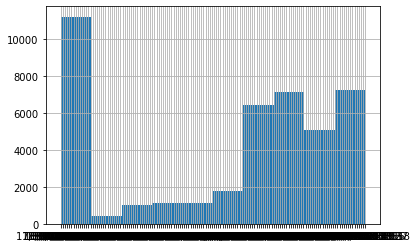

In [78]:
df['created_at'].hist()

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42624 entries, 0 to 42623
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   tweet_id                   42624 non-null  float64       
 1   text                       42624 non-null  object        
 2   link                       42624 non-null  object        
 3   created_at                 42624 non-null  object        
 4   timestamp_ms               42624 non-null  datetime64[ns]
 5   user_id                    42624 non-null  float64       
 6   user_name                  42621 non-null  object        
 7   user_screen_name           42624 non-null  object        
 8   user_location              25857 non-null  object        
 9   geo                        530 non-null    object        
 10  coordinates                530 non-null    object        
 11  place_full_name            5738 non-null   object        
 12  plac

In [80]:
from datetime import datetime
df['created_datetime'] =  pd.to_datetime(df['created_at'], format = '%Y-%m-%d %H:%M:%S',errors='coerce')

In [81]:
df['created_at'][0]

'17/10/2020 23:59'

In [82]:
df['created_datetime'][:100]

0    NaT
1    NaT
2    NaT
3    NaT
4    NaT
      ..
95   NaT
96   NaT
97   NaT
98   NaT
99   NaT
Name: created_datetime, Length: 100, dtype: datetime64[ns]

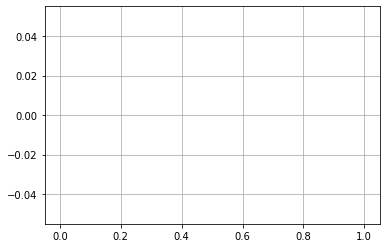

In [83]:
df['created_datetime'].hist()

In [84]:
df_grp = df.groupby(df['created_datetime']).agg('sum')
df_grp = df_grp.reset_index()

In [85]:
df

,tweet_id,text,link,created_at,timestamp_ms,user_id,user_name,user_screen_name,user_location,geo,coordinates,place_full_name,place_country,retweeted_status_id,in_reply_to_status_id,sarcasm_value,processed_tweets,processed_polarity_scores,compounded,created_datetime
0,1.317620e+18,"RT @MajorPatriot: ""He's a criminal. He's comm...",https://twitter.com/joelstephens7/status/13176...,17/10/2020 23:59,2020-10-18 08:13:20,1.050534e+09,Joel Stephens,joelstephens7,NaN,NaN,NaN,NaN,NaN,1.317590e+18,NaN,59,RT Hes criminal Hes committed crimes President...,"{'neg': 0.206, 'neu': 0.667, 'pos': 0.127, 'co...",-0.3182,NaT
1,1.317620e+18,The wya she single handedly saved 2020 https:/...,https://twitter.com/muglermonsterr/status/1317...,17/10/2020 23:59,2020-10-18 08:13:20,2.708109e+09,Avatar Gabriel 🌊,muglermonsterr,"Phoenix, AZ",NaN,NaN,"Phoenix, AZ",United States,NaN,NaN,12,The wya single handedly saved 2020 httpstco Os...,"{'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'comp...",0.4215,NaT
2,1.317620e+18,RT @dbongino: WHAT ELSE DO CHINA &amp; RUSSIA ...,https://twitter.com/SchumannSteve/status/13176...,17/10/2020 23:59,2020-10-18 08:13:20,3.335182e+08,Steven Schumann,SchumannSteve,"Grover Beach to Nipomo, CA",NaN,NaN,NaN,NaN,1.317590e+18,NaN,-55,RT WHAT ELSE DO CHINA amp RUSSIA HAVE ON BIDEN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NaT
3,1.317620e+18,@EVR551 TRUMP'S department of defense. The art...,https://twitter.com/Pooch7171/status/131761637...,17/10/2020 23:59,2020-10-18 08:13:20,1.764774e+08,Gruncle Pooch ⚪,Pooch7171,VerticalSafeZoneAboveTheBag,NaN,NaN,NaN,NaN,NaN,1.317610e+18,21,TRUMPS department defense The article forgot m...,"{'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound...",0.1280,NaT
4,1.317620e+18,RT @machineiv: Dan Rather gets it.\n\nYou have...,https://twitter.com/jgkoomey/status/1317616370...,17/10/2020 23:59,2020-10-18 08:13:20,1.388302e+08,Jonathan Koomey,jgkoomey,"California, USA",NaN,NaN,NaN,NaN,1.317600e+18,NaN,-23,RT Dan Rather gets You excuse patting Republic...,"{'neg': 0.0, 'neu': 0.894, 'pos': 0.106, 'comp...",0.0772,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42619,1.317830e+18,@ProgressIsComin @neeratanden @aaronjmate A br...,https://twitter.com/emoney2313/status/13178274...,18/10/2020 13:58,2020-10-18 22:06:40,9.173850e+17,TheFourroyalmuskitiers,emoney2313,NaN,NaN,NaN,"Queens, NY",United States,NaN,1.317360e+18,-42,A brown woman dangerous white person Ok Nazi,"{'neg': 0.301, 'neu': 0.485, 'pos': 0.214, 'co...",-0.2263,NaT
42620,1.317830e+18,I remember https://t.co/Ho6lRoDDi3,https://twitter.com/Romudeth/status/1317827420...,18/10/2020 13:58,2020-10-18 22:06:40,2.161039e+08,Tony Polanco,Romudeth,"Queens, NY",NaN,NaN,"Queens, NY",United States,NaN,NaN,-25,I remember httpstco Ho6l RoD Di3,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NaT
42621,1.317830e+18,RT @laralogan: Twitter employees reveal deep h...,https://twitter.com/realityhammer/status/13178...,18/10/2020 13:58,2020-10-18 22:06:40,3.726601e+07,Reality Hammer | Data Analytics Gunslinger | P...,realityhammer,Christmas Island,NaN,NaN,NaN,NaN,1.317810e+18,NaN,-2,RT Twitter employees reveal deep hatred Trump ...,"{'neg': 0.318, 'neu': 0.682, 'pos': 0.0, 'comp...",-0.6369,NaT
42622,1.317830e+18,RT @DanRather: I want to live in a country whe...,https://twitter.com/PatrickNazzaro/status/1317...,18/10/2020 13:58,2020-10-18 22:06:40,7.328140e+08,Patrick,PatrickNazzaro,NaN,NaN,NaN,NaN,NaN,1.317590e+18,NaN,-33,RT I want live country decency honesty compete...,"{'neg': 0.0, 'neu': 0.64, 'pos': 0.36, 'compou...",0.5423,NaT


In [86]:
df.head()

,tweet_id,text,link,created_at,timestamp_ms,user_id,user_name,user_screen_name,user_location,geo,coordinates,place_full_name,place_country,retweeted_status_id,in_reply_to_status_id,sarcasm_value,processed_tweets,processed_polarity_scores,compounded,created_datetime
0,1.317620e+18,"RT @MajorPatriot: ""He's a criminal. He's comm...",https://twitter.com/joelstephens7/status/13176...,17/10/2020 23:59,2020-10-18 08:13:20,1.050534e+09,Joel Stephens,joelstephens7,NaN,NaN,NaN,NaN,NaN,1.317590e+18,NaN,59,RT Hes criminal Hes committed crimes President...,"{'neg': 0.206, 'neu': 0.667, 'pos': 0.127, 'co...",-0.3182,NaT
1,1.317620e+18,The wya she single handedly saved 2020 https:/...,https://twitter.com/muglermonsterr/status/1317...,17/10/2020 23:59,2020-10-18 08:13:20,2.708109e+09,Avatar Gabriel 🌊,muglermonsterr,"Phoenix, AZ",NaN,NaN,"Phoenix, AZ",United States,NaN,NaN,12,The wya single handedly saved 2020 httpstco Os...,"{'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'comp...",0.4215,NaT
2,1.317620e+18,RT @dbongino: WHAT ELSE DO CHINA &amp; RUSSIA ...,https://twitter.com/SchumannSteve/status/13176...,17/10/2020 23:59,2020-10-18 08:13:20,3.335182e+08,Steven Schumann,SchumannSteve,"Grover Beach to Nipomo, CA",NaN,NaN,NaN,NaN,1.317590e+18,NaN,-55,RT WHAT ELSE DO CHINA amp RUSSIA HAVE ON BIDEN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NaT
3,1.317620e+18,@EVR551 TRUMP'S department of defense. The art...,https://twitter.com/Pooch7171/status/131761637...,17/10/2020 23:59,2020-10-18 08:13:20,1.764774e+08,Gruncle Pooch ⚪,Pooch7171,VerticalSafeZoneAboveTheBag,NaN,NaN,NaN,NaN,NaN,1.317610e+18,21,TRUMPS department defense The article forgot m...,"{'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound...",0.1280,NaT
4,1.317620e+18,RT @machineiv: Dan Rather gets it.\n\nYou have...,https://twitter.com/jgkoomey/status/1317616370...,17/10/2020 23:59,2020-10-18 08:13:20,1.388302e+08,Jonathan Koomey,jgkoomey,"California, USA",NaN,NaN,NaN,NaN,1.317600e+18,NaN,-23,RT Dan Rather gets You excuse patting Republic...,"{'neg': 0.0, 'neu': 0.894, 'pos': 0.106, 'comp...",0.0772,NaT


In [87]:
df['neutral'].hist()

KeyError: 'neutral'

In [98]:
df.shape

(42624, 21)

In [100]:
df_test.shape[0]

25347

In [99]:
df['neutral'] = df['processed_polarity_scores'].apply(lambda x: x['neu'])
df_test = df[df['neutral']<1]

In [101]:
df_test.head()

,tweet_id,text,link,created_at,timestamp_ms,user_id,user_name,user_screen_name,user_location,geo,...,place_full_name,place_country,retweeted_status_id,in_reply_to_status_id,sarcasm_value,processed_tweets,processed_polarity_scores,compounded,created_datetime,neutral
0,1.317620e+18,"RT @MajorPatriot: ""He's a criminal. He's comm...",https://twitter.com/joelstephens7/status/13176...,17/10/2020 23:59,2020-10-18 08:13:20,1.050534e+09,Joel Stephens,joelstephens7,NaN,NaN,...,NaN,NaN,1.317590e+18,NaN,59,RT Hes criminal Hes committed crimes President...,"{'neg': 0.206, 'neu': 0.667, 'pos': 0.127, 'co...",-0.3182,NaT,0.667
1,1.317620e+18,The wya she single handedly saved 2020 https:/...,https://twitter.com/muglermonsterr/status/1317...,17/10/2020 23:59,2020-10-18 08:13:20,2.708109e+09,Avatar Gabriel 🌊,muglermonsterr,"Phoenix, AZ",NaN,...,"Phoenix, AZ",United States,NaN,NaN,12,The wya single handedly saved 2020 httpstco Os...,"{'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'comp...",0.4215,NaT,0.714
3,1.317620e+18,@EVR551 TRUMP'S department of defense. The art...,https://twitter.com/Pooch7171/status/131761637...,17/10/2020 23:59,2020-10-18 08:13:20,1.764774e+08,Gruncle Pooch ⚪,Pooch7171,VerticalSafeZoneAboveTheBag,NaN,...,NaN,NaN,NaN,1.317610e+18,21,TRUMPS department defense The article forgot m...,"{'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound...",0.1280,NaT,0.800
4,1.317620e+18,RT @machineiv: Dan Rather gets it.\n\nYou have...,https://twitter.com/jgkoomey/status/1317616370...,17/10/2020 23:59,2020-10-18 08:13:20,1.388302e+08,Jonathan Koomey,jgkoomey,"California, USA",NaN,...,NaN,NaN,1.317600e+18,NaN,-23,RT Dan Rather gets You excuse patting Republic...,"{'neg': 0.0, 'neu': 0.894, 'pos': 0.106, 'comp...",0.0772,NaT,0.894
5,1.317620e+18,RT @RedState: Media Tries to Use Hunter Biden'...,https://twitter.com/debraco18403408/status/131...,17/10/2020 23:59,2020-10-18 08:13:20,1.152290e+18,debra cole,debraco18403408,NaN,NaN,...,NaN,NaN,1.317600e+18,NaN,-20,RT Media Tries Use Hunter Bidens Drug Problem ...,"{'neg': 0.166, 'neu': 0.675, 'pos': 0.16, 'com...",-0.0258,NaT,0.675


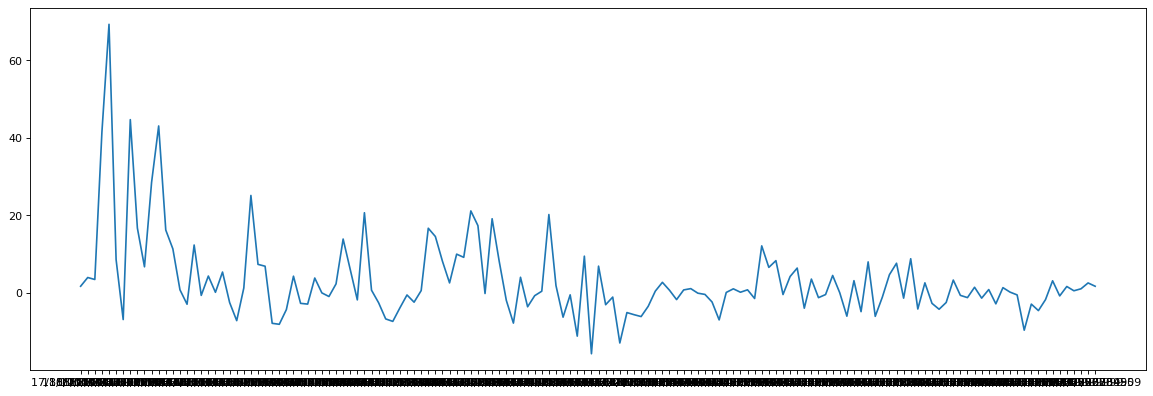

In [109]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df_test.index,df_test['compounded'])

In [ ]:
df['compounded'].mean()

In [107]:
df_test = df_test.groupby(df['created_at']).agg('sum')

In [96]:
df_test.head()

,tweet_id,user_id,retweeted_status_id,in_reply_to_status_id,compounded,neutral
created_datetime,,,,,,


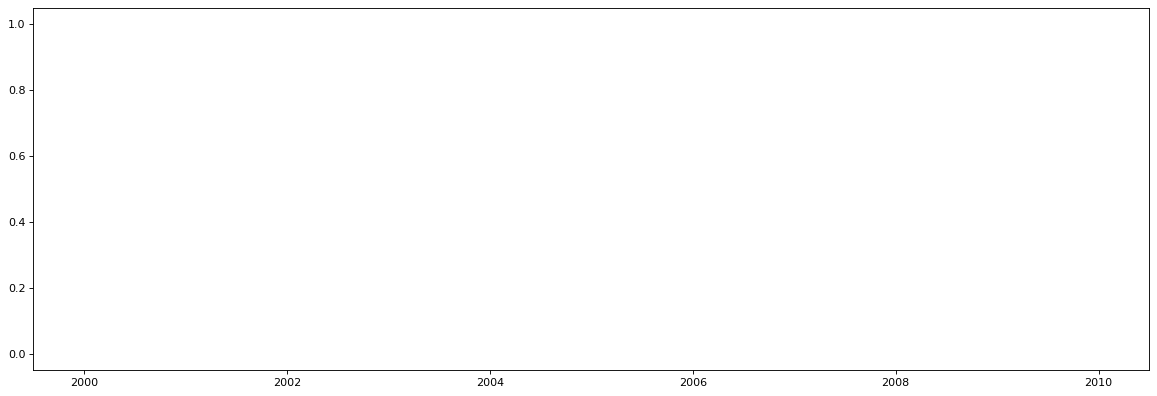

In [94]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df_test.index[:100],df_test['neutral'][:100])

### EDA for polling data

In [ ]:
poll_data = pd.read_csv('data/polls/presidential_poll_averages_2020.csv')

In [ ]:
poll_data.head()

In [ ]:
poll_agg = poll_data.groupby(['modeldate','candidate_name'])['pct_estimate'].mean().reset_index()
poll_agg.head(20)

In [ ]:
poll_data['candidate_name'].value_counts()

In [90]:
poll_data['modeldate'] = pd.to_datetime(poll_data['modeldate'])

NameError: name 'poll_data' is not defined

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(18, 12), dpi=80, facecolor='w', edgecolor='k')
for candidate_name, data in poll_data.groupby('candidate_name'):
    plt.plot(data['modeldate'], data['pct_estimate'], label=candidate_name)

In [ ]:
trump_polls = poll_agg[poll_agg['candidate_name']=='Donald Trump']
biden_polls = poll_agg[poll_agg['candidate_name']=='Joseph R. Biden Jr.']

In [ ]:
trump_polls['modeldate'].value_counts()

In [ ]:
biden_polls['modeldate'].value_counts()

In [ ]:
figure(num=None, figsize=(18, 12), dpi=80, facecolor='w', edgecolor='k')
plt.plot(trump_polls['modeldate'],trump_polls['pct_estimate'],label='Trump')
plt.plot(biden_polls['modeldate'],biden_polls['pct_estimate'],label='Biden')
plt.xlabel('x - axis')
# Set the y axis label of the current axis.
plt.ylabel('y - axis')
# Set a title of the current axes.
plt.title('Two or more lines on same plot with suitable legends ')
plt.legend()
plt.show()